#### packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

#### analysis

data

In [2]:
data = pd.read_csv("annual_temperature_emissions_1974-2023.csv",index_col=0)

Emissions over time

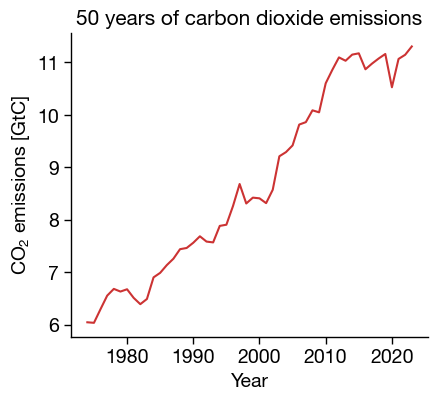

In [3]:
fig = plt.figure(figsize=(4.3,4))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 14.0
rcParams["axes.linewidth"] = 1
rcParams['xtick.major.size'] = 5
rcParams['xtick.major.width'] = 1
rcParams['ytick.major.size'] = 5
rcParams['ytick.major.width'] = 1
rcParams["mathtext.default"] = "regular"

gs0 = gridspec.GridSpec(1,1)
gs0.update(left=0.15,right=0.98,top=0.92,bottom=0.16,wspace=0.25,hspace=0.18)

tfs = 15

ax = plt.subplot(gs0[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.plot(data.year,data.ann_emissions.values,
         color=[0.8,0.2,0.2])
plt.title("50 years of carbon dioxide emissions",fontsize=tfs)
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ emissions [GtC]")

plt.savefig("Emissions.jpg",dpi=300)
plt.show()

GMT with respect to time and emissions

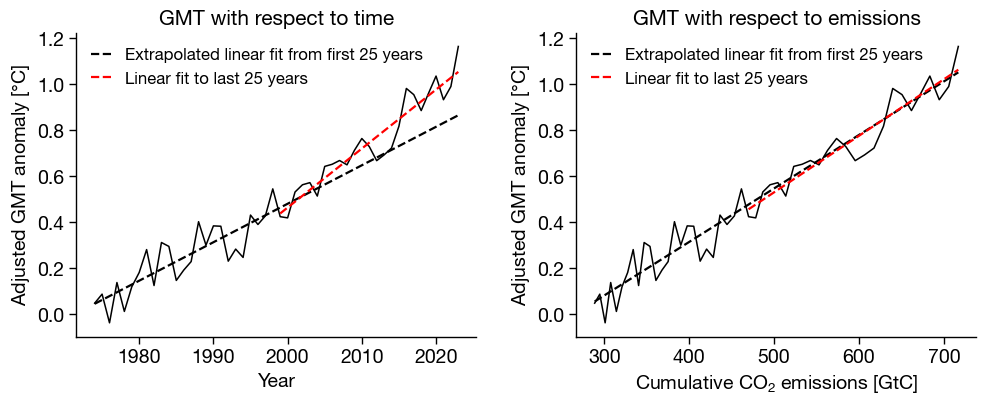

In [4]:
fig = plt.figure(figsize=(10,4))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 14.0
rcParams["axes.linewidth"] = 1
rcParams['xtick.major.size'] = 5
rcParams['xtick.major.width'] = 1
rcParams['ytick.major.size'] = 5
rcParams['ytick.major.width'] = 1
rcParams["mathtext.default"] = "regular"

gs0 = gridspec.GridSpec(1,2)
gs0.update(left=0.08,right=0.98,top=0.92,bottom=0.16,wspace=0.25,hspace=0.18)

tfs = 15

for z in [0,1]:
    
    ax = plt.subplot(gs0[0,z])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    if z==0:
        x = "year"
        plt.xlabel("Year")
        plt.title("GMT with respect to time",fontsize=tfs)
    elif z==1:
        x = "emissions"
        plt.xlabel(r"Cumulative CO$_2$ emissions [GtC]")
        plt.title("GMT with respect to emissions",fontsize=tfs)
        
    plt.plot(data[x],data.gmt_anomaly,color="black",linewidth=1.1) #color=[0.8,0.2,0.2])
    
    plt.ylabel(r"Adjusted GMT anomaly [$\degree$C]")
    
    polyfit1 = np.polyfit(data.loc[data.period==0,x].values,
                          data.loc[data.period==0,"gmt_anomaly"].values,deg=1)
    ypred1 = polyfit1[1] + polyfit1[0]*data[x].values
    plt.plot(data[x].values,ypred1,color="black",linewidth=1.6,linestyle="--",
            label="Extrapolated linear fit from first 25 years")
    
    polyfit2 = np.polyfit(data.loc[data.period==1,x].values,
                          data.loc[data.period==1,"gmt_anomaly"].values,deg=1)
    ypred2 = polyfit2[1] + polyfit2[0]*data.loc[data.period==1,x].values
    plt.plot(data.loc[data.period==1,x].values,ypred2,
             color="red",linewidth=1.6,linestyle="--",
            label="Linear fit to last 25 years")

    leg = plt.legend(loc="upper left",fontsize=12,frameon=False,handlelength=1.2)
    for legobj in leg.legend_handles:
        legobj.set_linewidth(1.6)

plt.savefig("GMT_Year_Emissions.jpg",dpi=300)
plt.show()

Get coefficients

In [5]:
year_model_results = pd.read_csv("year_interaction_model_results.csv",index_col=0)
emis_model_results = pd.read_csv("emissions_interaction_model_results.csv",index_col=0)

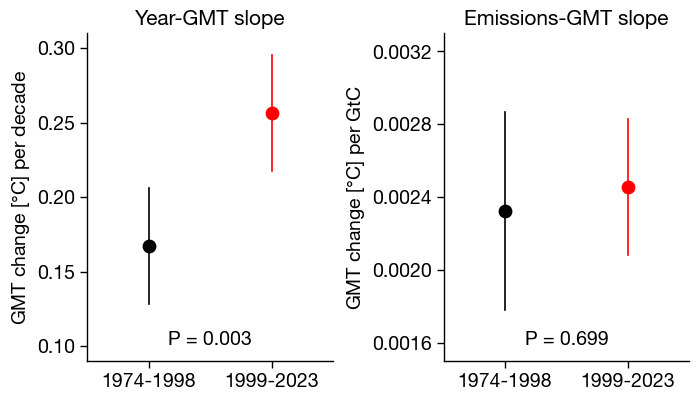

In [6]:
fig = plt.figure(figsize=(7,4))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 14.0
rcParams["axes.linewidth"] = 1
rcParams['xtick.major.size'] = 5
rcParams['xtick.major.width'] = 1
rcParams['ytick.major.size'] = 5
rcParams['ytick.major.width'] = 1
rcParams["mathtext.default"] = "regular"

gs0 = gridspec.GridSpec(1,2)
gs0.update(left=0.12,right=0.98,top=0.92,bottom=0.1,wspace=0.45,hspace=0.18)

tfs = 15

ax = plt.subplot(gs0[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

df = year_model_results.copy()
plt.scatter(0,df.loc[df.term=="estimate","year_period0"]*10,
            color="black",s=80)
plt.plot([0,0],[df.loc[df.term=="estimate","year_period0"].values[0]*10-df.loc[df.term=="se","year_period0"].values[0]*1.96*10,
                df.loc[df.term=="estimate","year_period0"].values[0]*10+df.loc[df.term=="se","year_period0"].values[0]*1.96*10],
         color="black",linewidth=1.2)

plt.scatter(1,df.loc[df.term=="estimate","year_period1"]*10,
            color="red",s=80)
plt.plot([1,1],[df.loc[df.term=="estimate","year_period1"].values[0]*10-df.loc[df.term=="se","year_period1"].values[0]*1.96*10,
                df.loc[df.term=="estimate","year_period1"].values[0]*10+df.loc[df.term=="se","year_period1"].values[0]*1.96*10],
         color="red",linewidth=1.2)
plt.xlim([-0.5,1.5])
plt.xticks([0,1],labels=["1974-1998","1999-2023"])

plt.ylabel(r"GMT change [$\degree$C] per decade")
plt.text(0.33,0.05,"P = 0.003",fontsize=14,transform=ax.transAxes)
plt.ylim([0.09,0.31])
plt.title("Year-GMT slope",fontsize=tfs)



ax = plt.subplot(gs0[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

df = emis_model_results.copy()
plt.scatter(0,df.loc[df.term=="estimate","emissions_period0"],
            color="black",s=80)
plt.plot([0,0],[df.loc[df.term=="estimate","emissions_period0"].values[0]-df.loc[df.term=="se","emissions_period0"].values[0]*1.96,
                df.loc[df.term=="estimate","emissions_period0"].values[0]+df.loc[df.term=="se","emissions_period0"].values[0]*1.96],
         color="black",linewidth=1.2)

plt.scatter(1,df.loc[df.term=="estimate","emissions_period1"],
            color="red",s=80)
plt.plot([1,1],[df.loc[df.term=="estimate","emissions_period1"].values[0]-df.loc[df.term=="se","emissions_period1"].values[0]*1.96,
                df.loc[df.term=="estimate","emissions_period1"].values[0]+df.loc[df.term=="se","emissions_period1"].values[0]*1.96],
         color="red",linewidth=1.2)
plt.xlim([-0.5,1.5])
plt.xticks([0,1],labels=["1974-1998","1999-2023"])

plt.ylabel(r"GMT change [$\degree$C] per GtC")

plt.text(0.33,0.05,"P = 0.699",fontsize=14,transform=ax.transAxes)
plt.ylim([0.0015,0.0033])
plt.yticks([0.0016,0.002,0.0024,0.0028,0.0032])
plt.title("Emissions-GMT slope",fontsize=tfs)



plt.savefig("Interaction_Model_Results.jpg",dpi=300)
plt.show()